In [9]:
!conda activate nlp

#!python -m spacy download en_core_web_lg --user #large spacy language model

In [10]:
import pandas as pd
import numpy as np
import os
import requests
from bs4 import BeautifulSoup
from urllib.request import Request, urlopen
import spacy
from spacy.tokens import Doc, Span, Token
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import random
from datetime import date, timedelta
import time
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import shutil
import glob
import webbrowser
from textblob import TextBlob
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\aqqes\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [11]:
# Use to download additional Spacy models
#spacy.cli.download("en")

In [12]:
username = os.getlogin()
os.getcwd()

'C:\\Users\\aqqes\\Documents\\GitHub\\bing_news_web_scrapping'

In [13]:
# Use if on Home Desktop
#os.chdir("\\Users\\%s\\Documents\\GitHub\\bing_news_sentiment_analysis" %(username))
#os.chdir("/Users/%s/Documents/GitHub/bing_news_sentiment_analysis" %(username))

In [14]:
# Defining what to search for and what website to search for it on
search_query = 'TSLA'
html_files_folder = "bing_news_html_files"

In [15]:
# Creating empty dataframe and lists to store data
article_df = pd.DataFrame()
article_df['article_id'] = ""
article_df['headline'] = ""
article_df['time'] = ""
article_df['retrieval_date'] = ""
article_df['description'] = ""
article_df['link'] = ""
title_list = []
description_list = []
time_list = []
link_list = []
article_id_list = []

In [16]:
#Navigating through the pages by selecting the next button
# import time
# driver = webdriver.Chrome(executable_path='Chrome_Driver/chromedriver')
# driver.get("https://www.bing.com/news/search?q=%s"\
# %(search_query))

# SCROLL_PAUSE_TIME = 1

# # Get scroll height
# last_height = driver.execute_script("return document.body.scrollHeight")

# while True:
#     # Scroll down to bottom
#     driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

#     # Wait to load page
#     time.sleep(SCROLL_PAUSE_TIME)

#     # Calculate new scroll height and compare with last scroll height
#     new_height = driver.execute_script("return document.body.scrollHeight")
#     if new_height == last_height:
#         break
#     last_height = new_height


# file = open("%s_bing_query.html"%(search_query), 'w')
# file.write(driver.page_source)
# file.close()
# shutil.move("%s_bing_query.html"%(search_query),\
#                "%s/%s_bing_query.html"%(html_files_folder,search_query))


# driver.close()

In [17]:
str(driver.page_source)[264502:264506]

't");'

In [18]:
html_file_list = glob.glob("bing_news_html_files/*%s*.html"%(search_query))
html_file_list

['bing_news_html_files\\$TSLA_bing_query.html']

In [19]:
# Note that google news HTML references may change at any time
# In order for this cell to work you may need to update the item.find lines to find the most recent data
for file in html_file_list:
    soup = BeautifulSoup(open(file))
    for item in soup.find_all('div', attrs={'class':'news-card newsitem cardcommon b_cards2'}):
        raw_link = (item.find('a',href=True)['href'])
        link = raw_link
        title = (item.find('a',attrs={'class':"title"}).get_text())
        article_info = (item.find('div',attrs={'class':"snippet"}).get_text())
        time = (item.find('span',attrs={'tabindex':"0"}).get_text())
        description = article_info
        title_list.append(title)
        description_list.append(description)
        time_list.append(time)
        link_list.append(link)
        article_id_list.append(random.randint(10000,99999))
        print(title)

Why Tesla (NASDAQ:TSLA) is One of the Best Buys in the S&P 500
Tesla Stock Price and Forecast: Why is TSLA up on Wednesday?
TSLA, NVDA, AAPL, NIO: Why Is the Stock Market Down Today?
Tesla (TSLA) Gains As Market Dips: What You Should Know
Tesla Inc. (NASDAQ: TSLA) Shares Might Go Up 65.14% This Year
Analyst Forecasts $1,000 Price Target for Tesla (TSLA)
How To Buy Tesla (TSLA) Stock
Institutions Own Fewer Tesla, Inc. Shares (NASDAQ:TSLA) Than You Might Think
Why TSLA Stock Investors Should Be Worried About The Rivian IPO
EV Roundup: TSLA Under NTSB Scrutiny, WKHS Drops Suit Against USPS & More
Tesla (TSLA) Crash in Florida Triggers 2nd NTSB Scrutiny This Year
TSLA, NVDA, AAPL, NIO: Why Is the Stock Market Down Today? | Fintech Zoom
One Way Or Another, Rivian Could Make History
Elon Musk Teases Plans For Another Tesla Gigafactory But Says EV Maker Hasn't Zeroed In On Russia
Analyzing Tesla, Inc. (TSLA): Future Growth Catalysts, Hedge Fund Sentiment and Analyst Ratings
Tesla Stops Referr

In [20]:
# Adding data to dataframe
article_df['headline'] = title_list
article_df['time'] = time_list
article_df['description'] = description_list
article_df['link'] = link_list
article_df['article_id'] = article_id_list
article_df['retrieval_date'] = (date.today()).strftime("%m/%d/%Y")

In [21]:
print("Total Articles Retrieved:",len(article_df))

Total Articles Retrieved: 182


In [22]:
article_df.head()

,article_id,headline,time,retrieval_date,description,link
0,44323,Why Tesla (NASDAQ:TSLA) is One of the Best Buy...,1h,09/22/2021,With the stock market pulling back sharply ove...,https://www.entrepreneur.com/article/386956
1,15229,Tesla Stock Price and Forecast: Why is TSLA up...,1h,09/22/2021,Tesla stock outperforms on Tuesday as stocks r...,https://www.fxstreet.com/news/tesla-tsla-stock...
2,15687,"TSLA, NVDA, AAPL, NIO: Why Is the Stock Market...",1d,09/22/2021,"InvestorPlace - Stock Market News, Stock Advic...",https://markets.businessinsider.com/news/stock...
3,71288,Tesla (TSLA) Gains As Market Dips: What You Sh...,14h,09/22/2021,"I n the latest trading session, Tesla (TSLA) c...",https://www.nasdaq.com/articles/tesla-tsla-gai...
4,19244,Tesla Inc. (NASDAQ: TSLA) Shares Might Go Up 6...,17h,09/22/2021,"In today’s recent session, 8.25 million shares...",https://marketingsentinel.com/2021/09/21/tesla...


In [23]:
from spacy.language import Language

In [24]:
#Create a function to get the sentiment
sid = SentimentIntensityAnalyzer()
@Language.component("get_sentiment")
def get_sentiment(doc):
    sentiment_dict = sid.polarity_scores(doc.text)
    sentiment_score = sentiment_dict['compound']
    doc._.set("sentiment_score", sentiment_score)
    if sentiment_score == 0:
        doc._.set("sentiment_category", "neutral")
    elif sentiment_score > 0:
        doc._.set("sentiment_category", "positive")
    elif sentiment_score < 0:
        doc._.set("sentiment_category", "negative")
    else:
        pass
    return doc

In [25]:
# Function to get textblob polarity and subjectivity
@Language.component("get_subjectivity")
def get_subjectivity(doc):
    sub_score = TextBlob(doc.text).subjectivity
    doc._.set("subjectivity_score", sub_score)
    return doc

In [26]:
nlp = spacy.load('en_core_web_lg')
Doc.set_extension("sentiment_score", default=None, force=True)
Doc.set_extension("sentiment_category", default=None, force=True)
Doc.set_extension("subjectivity_score", default=None, force=True)

In [27]:
nlp.add_pipe("get_sentiment", last=True)
nlp.add_pipe("get_subjectivity", last=True)
print(nlp.pipe_names)

['tok2vec', 'tagger', 'parser', 'ner', 'attribute_ruler', 'lemmatizer', 'get_sentiment', 'get_subjectivity']


In [28]:
def calculate_sentiment_score(text):
    doc = nlp(text)
    return doc._.sentiment_score

In [29]:
def calculate_subjectivity_score(text):
    doc = nlp(text)
    return doc._.subjectivity_score

In [30]:
def calculate_sentiment_category(text):
    doc = nlp(text)
    return doc._.sentiment_category

In [31]:
def get_article_date(time_text):
    if "d" in time_text:
        days_to_subtract = int(time_text[0])
        article_date = (date.today() - timedelta(days=days_to_subtract)).strftime("%Y-%m-%d")
    elif 'h' in time_text:
        hours_to_subtract = int(time_text[0])
        days_to_subtract  = hours_to_subtract/24
        article_date = (date.today() - timedelta(days=days_to_subtract)).strftime("%Y-%m-%d")
    elif 'mon' in time_text:
        months_to_subtract = int(time_text[0])
        days_to_subtract  = months_to_subtract * 30
        article_date = (date.today() - timedelta(days=days_to_subtract)).strftime("%Y-%m-%d")
    else:
        article_date = None
    return article_date


In [32]:
article_df['hl_sent_score'] = article_df['headline'].apply(calculate_sentiment_score)
article_df['hl_sent_cat'] = article_df['headline'].apply(calculate_sentiment_category)
article_df['hl_sub_score'] = article_df['headline'].apply(calculate_subjectivity_score)

In [33]:
article_df['desc_sent_score'] = article_df['description'].apply(calculate_sentiment_score)
article_df['desc_sent_cat'] = article_df['description'].apply(calculate_sentiment_category)
article_df['desc_sub_score'] = article_df['description'].apply(calculate_subjectivity_score)

In [34]:
article_df['article_date'] = article_df['time'].apply(get_article_date)
article_df['article_date'] = article_df['article_date'].astype(str)

In [35]:
article_df.head()

,article_id,headline,time,retrieval_date,description,link,hl_sent_score,hl_sent_cat,hl_sub_score,desc_sent_score,desc_sent_cat,desc_sub_score,article_date
0,44323,Why Tesla (NASDAQ:TSLA) is One of the Best Buy...,1h,09/22/2021,With the stock market pulling back sharply ove...,https://www.entrepreneur.com/article/386956,0.6369,positive,0.300000,0.0000,neutral,0.291333,2021-09-22
1,15229,Tesla Stock Price and Forecast: Why is TSLA up...,1h,09/22/2021,Tesla stock outperforms on Tuesday as stocks r...,https://www.fxstreet.com/news/tesla-tsla-stock...,0.0000,neutral,0.000000,-0.2732,negative,0.400000,2021-09-22
2,15687,"TSLA, NVDA, AAPL, NIO: Why Is the Stock Market...",1d,09/22/2021,"InvestorPlace - Stock Market News, Stock Advic...",https://markets.businessinsider.com/news/stock...,0.0000,neutral,0.288889,0.0000,neutral,0.850000,2021-09-21
3,71288,Tesla (TSLA) Gains As Market Dips: What You Sh...,14h,09/22/2021,"I n the latest trading session, Tesla (TSLA) c...",https://www.nasdaq.com/articles/tesla-tsla-gai...,0.3400,positive,0.000000,-0.0258,negative,0.291667,2021-09-22
4,19244,Tesla Inc. (NASDAQ: TSLA) Shares Might Go Up 6...,17h,09/22/2021,"In today’s recent session, 8.25 million shares...",https://marketingsentinel.com/2021/09/21/tesla...,0.2960,positive,0.000000,0.5267,positive,0.333333,2021-09-22


In [36]:
import yfinance as yf
from datetime import datetime
ticker_to_search = "SNOW"

stock = yf.Ticker(ticker_to_search)

In [37]:
dates_of_interest = sorted([ x for x in article_df['article_date'].unique().tolist() if x != "None"])
min_date = datetime.strptime(min(dates_of_interest),"%Y-%m-%d")
max_date =datetime.strptime(max(dates_of_interest),"%Y-%m-%d")
print("Date Range:",min_date,"-",max_date)

Date Range: 2021-03-26 00:00:00 - 2021-09-22 00:00:00


In [38]:
hist = stock.history(start=min_date,end=max_date)

In [39]:
hist.reset_index(inplace=True)
hist.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2021-03-26,220.000000,235.000000,219.000000,235.000000,8978700,0,0
1,2021-03-29,230.550003,236.220001,221.039993,223.490005,4373900,0,0
2,2021-03-30,221.350006,224.770004,216.259995,222.070007,3496500,0,0
3,2021-03-31,222.720001,234.059998,222.449997,229.279999,3680200,0,0
4,2021-04-01,234.949997,237.589996,232.020004,236.789993,2905100,0,0


In [40]:
hist['Date'] = hist['Date'].astype(str)
hist = hist[["Date","Close"]]

In [41]:
sent_by_date_df = article_df.groupby('article_date').agg({'hl_sent_score':'mean','hl_sub_score':'mean',\
                                                 'desc_sent_score':'mean','desc_sub_score':'mean'})
sent_by_date_df.reset_index(inplace=True)
sent_by_date_df.head()

,article_date,hl_sent_score,hl_sub_score,desc_sent_score,desc_sub_score
0,2021-03-26,0.202300,0.268000,0.000000,0.563333
1,2021-08-23,0.045206,0.236826,0.179970,0.417672
2,2021-09-13,-0.273200,0.000000,0.401900,0.000000
3,2021-09-14,0.002100,0.083333,0.211383,0.272917
4,2021-09-15,0.233333,0.373377,0.292633,0.536616


In [42]:
stock_sent_df = sent_by_date_df.merge(hist, left_on='article_date',right_on='Date',how='left')
#stock_sent_df['article_date'] = pd.to_datetime(pd.Series(stock_sent_df['article_date']), format ="%Y-%m-%d")
stock_sent_df['company'] = search_query
stock_sent_df.head()

,article_date,hl_sent_score,hl_sub_score,desc_sent_score,desc_sub_score,Date,Close,company
0,2021-03-26,0.202300,0.268000,0.000000,0.563333,2021-03-26,235.000000,TSLA
1,2021-08-23,0.045206,0.236826,0.179970,0.417672,2021-08-23,276.440002,TSLA
2,2021-09-13,-0.273200,0.000000,0.401900,0.000000,2021-09-13,318.450012,TSLA
3,2021-09-14,0.002100,0.083333,0.211383,0.272917,2021-09-14,319.250000,TSLA
4,2021-09-15,0.233333,0.373377,0.292633,0.536616,2021-09-15,324.079987,TSLA


In [43]:
numerical_features = [x for x in stock_sent_df.columns.tolist() if x not in ["Date","company","article_date","Dividends","Stock Splits"]]

In [44]:
# Which features are highly correlated?
corr = stock_sent_df[numerical_features].corr()
corr.style.background_gradient(cmap='coolwarm')

,hl_sent_score,hl_sub_score,desc_sent_score,desc_sub_score,Close
hl_sent_score,1.000000,0.455669,-0.326409,0.706584,-0.237214
hl_sub_score,0.455669,1.000000,-0.135819,0.392652,-0.113620
desc_sent_score,-0.326409,-0.135819,1.000000,-0.449933,0.569148
desc_sub_score,0.706584,0.392652,-0.449933,1.000000,-0.447632
Close,-0.237214,-0.113620,0.569148,-0.447632,1.000000


In [ ]:
import matplotlib.pyplot as plt

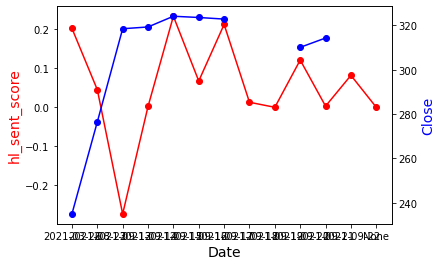

In [49]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(stock_sent_df.article_date, stock_sent_df.hl_sent_score, color="red", marker="o")
# set x-axis label
ax.set_xlabel("Date",fontsize=14)
# set y-axis label
ax.set_ylabel("hl_sent_score",color="red",fontsize=14)


# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(stock_sent_df.article_date, stock_sent_df["Close"],color="blue",marker="o")
ax2.set_ylabel("Close",color="blue",fontsize=14)
plt.show()


In [ ]:
print(stock.info)

In [46]:
# What specific entities were mentioned in the article descriptions?
for i in article_df['description'].tolist():
    doc = nlp(i)
    for entity in doc.ents:
         print(entity.text,":",entity.label_)

Tesla : ORG
Tuesday : DATE
Fed : ORG
Tesla : ORG
Tuesday : DATE
InvestorPlace - Stock Market News : ORG
Monday : DATE
Tesla : ORG
TSLA : PERSON
739.38 : MONEY
+1.26% : PERCENT
the previous day : DATE
daily : DATE
0.08% : PERCENT
today : DATE
today : DATE
8.25 million : CARDINAL
the Tesla Inc. : ORG
NASDAQ : ORG
TSLA : PERSON
1.95 : CARDINAL
740.89 : MONEY
10.72 : MONEY
Tesla : ORG
TSLA : ORG
last year's : DATE
Wedbush : ORG
Daniel Ives : PERSON
Elon Musk : PERSON
Tesla : ORG
Tesla, Inc. : ORG
NASDAQ : ORG
TSLA : PERSON
late August : DATE
Rivian : NORP
Rivian : NORP
Tesla : ORG
TSLA : PERSON
Elon Musk : PERSON
TSLA : ORG
NTSB : ORG
today : DATE
a week : DATE
about 30 days : DATE
second : ORDINAL
NTSB : ORG
Tesla : ORG
TSLA : PERSON
3 : CARDINAL
Florida : GPE
two : CARDINAL
Monday : DATE
this month : DATE
U.S. : GPE
Tesla Inc : ORG
TSLA : PERSON
Last week : DATE
Rivian : NORP
Elon Musk : PERSON
Monday : DATE
fourth : ORDINAL
Gigafactory : LOC
Tesla, Inc. : ORG
Tesla Inc : ORG
NASDAQ : OR

Tesla, Inc. : ORG
NASDAQ : ORG
TSLA : PERSON
Tesla Inc's : ORG
TSLA : PERSON
Tesla Inc : ORG
TSLA : PERSON
China : GPE
this year : DATE
July : DATE
Tesla : ORG
Ark Invest's : PERSON
Cathie Wood : ORG
Tesla Inc : ORG
NASDAQ : ORG
TSLA : PERSON
today : DATE
Tesla Inc : ORG
TSLA : PERSON
the 1920s : DATE
Casesa : ORG
CNBC : ORG
Tesla Bear : PERSON
Tesla Inc : ORG
TSLA : PERSON
NEW YORK : GPE
Aug. 31, 2021 : DATE
GLOBE NEWSWIRE : ORG
Pomerantz LLP : ORG
Tesla, Inc. : ORG
the “Company” : ORG
TSLA : PERSON
Aug 11, 2021 : DATE
Comtex : ORG
Tesla : ORG
TSLA : PERSON
Biden : PERSON
the White House : FAC
Today : DATE
Tesla : ORG
TSLA : PERSON
Elon Musk’s : PERSON
EV : ORG
Tesla Inc. : ORG
NASDAQ : ORG
TSLA : PERSON
Tesla : ORG
NASDAQ : ORG
TSLA : PERSON
EV : ORG
Elon Musk’s : PERSON
Tuesday : DATE
Tesla Inc : ORG
TSLA : PERSON
200 : CARDINAL
663.91 : MONEY
as low as $ : MONEY
659.11 : MONEY
Tesla Inc : ORG
Tesla : ORG
TSLA : PERSON
TSLA : ORG
20-day : DATE
NEW YORK : GPE
Aug. 17, 2021 : DATE
Bro

In [ ]:
# What do each of the entity tags in these articles represent?
# entity_tags =[]
# for i in article_df['description'].tolist():
#     doc = nlp(i)
#     for entity in doc.ents:
#         entity_tags.append(entity.label_)

# entity_tags = set(entity_tags)
# for tag in entity_tags:
#     print(tag,":",spacy.explain(tag))
      

In [ ]:
# What is the sentiment socre associated with each articles description?
# x = 0
# for description in article_df['description'].tolist():
#     doc = nlp(description)
#     print(article_df['title'][x],':', doc._.sentiment_score)
#     x+=1